# 3) Data Exploration (EDA)

In [2]:
import  os
import  warnings
warnings.filterwarnings("ignore")

In [3]:
import   pandas                as     pd
import   numpy                 as     np
import   matplotlib.pyplot     as     plt
import   seaborn               as     sns
import   scipy.stats           as     stats
from     scipy                 import stats

In [4]:
from   statsmodels.stats.outliers_influence   import   variance_inflation_factor

In [5]:
def dentify_outliers(df,var):
    # Interquartile Range,(IQR)
    
    # Calculate the upper,lower limits
    Q1                     =   df[var].quantile(0.25)
    Q3                     =   df[var].quantile(0.75)
    IQR                    =   Q3 - Q1
    low                    =   Q1 - (1.5 * IQR)
    
    lower                  =   abs(Q1 - 1.5 * IQR)
    upper                  =   abs(Q3 + (1.5 * IQR))
    outlier_upper          =   df[df[var] > upper].count()[1]
    outlier_lower          =   df[df[var] < low].count()[1]
    
    m                      =   np.min(df[var])
    mX                     =   np.max(df[var])
    Zero_l                 =   df.loc[df[var]==0,var].sum()
    
    print("\nFeature:{}, Lower_quartile: {}, Upper_quartile:{} ".format(var,lower,upper))
    print("\nMax,value:{},Minimum,value: {}".format(mX, m))
    print("\nGreater than UpperIQR:{} Less than lower_IQR:{} zero_count:{}".format(outlier_upper,outlier_lower,Zero_l))
    
    outliers_present      =    outlier_upper > 0 or outlier_lower > 0
    if outliers_present:
       print("\nVariable {} has outliers".format(var))
    else:
       print("\nVariable {} has NO outliers".format(var))
    df.boxplot(column = [var])
    plt.show()

def chk_ttest(var):
    g1           =    df.loc[df['Target'] == 0, var]
    g2           =    df.loc[df['Target'] == 1, var]    
    stat, pval   =    stats.ttest_ind(g1, g2, equal_var = False)
    txt          =    "\nThere is No statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    if pval < 0.05:
       txt       =    "\nThere is a statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    
    print(txt)

In [7]:
def chk_kruskal(var):
    import       scipy.stats   as   stats
    g1           =   df.loc[df['Target'] == 0, var]
    g2           =   df.loc[df['Target'] == 1, var]    
    stat, pval   =   stats.kruskal(g1, g2)
    txt          =   "\nThere is No statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    if pval < 0.05:
       txt       =   "\nThere is a statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    print(txt)   

In [8]:
def chk_chisq(i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    crosstab                                    = pd.crosstab(df[var], df['Target'])
    res                                         = stats.chi2_contingency(crosstab)
    txt                                         =  "Independent Variable and Target variable are independent"
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5")
    print("\nThis can be checked by looking at the expected frequency table.")
    print(res)
    # Calculate the percentage of cells with expected counts less than 5\
    expected                =  res[3]
    percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100
    print("\n")
    print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
    
    if res[1] < 0.05:
        txt                                     =  "Independent Variable,{} and Target variable are dependent".format(var)    
 
    print("\n{}".format(txt))   

In [9]:
def  draw_countplot(df, i, var):
     print("\n{0}: Variable, {1}".format(i, var))
     x         =  df[var]
     y         =  df['Target']
     ttile     =  "Bar Chart for the variable: {}".format(var) 
     plt.title(ttile)    
     sns.countplot(x = x, hue = y, data = df)
     plt.xticks(rotation = 90)
     plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [11]:
def str_replace(col,val):
    df[col] = df[col].replace(val,'Others')

In [12]:
folder = r'E:\DSE-FT-B-JUN24-G2'
pd.set_option('display.max_columns',None)
os.chdir(folder)

In [13]:
file  = './Data/DSEFTB-JUN24-G2-EDA_2024_11_24_12_15_02.csv'
df    =  pd.read_csv(file, encoding = 'Latin-1')

In [14]:
df['diag_3'] = df['diag_3'].astype('object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   gender                    101766 non-null  object
 1   age                       101766 non-null  object
 2   admission_type_id         101766 non-null  int64 
 3   discharge_disposition_id  101766 non-null  int64 
 4   admission_source_id       101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  number_diagnoses          101766 non-null  int64 
 13  max_glu_serum             101766 non-null  object
 14  A1Cr

### Read the data file containing numeric values

In [17]:
num_file  = './Data/DSEFTB-JUN24-G2-Models_2024_11_24_12_14_44.csv'
num_df    =  pd.read_csv(num_file, encoding = 'Latin-1')
num_df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'Target'],
      dtype='object')

In [18]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   payer_code                101766 non-null  int64
 8   medical_specialty         101766 non-null  int64
 9   num_lab_procedures        101766 non-null  int64
 10  num_procedures            101766 non-null  int64
 11  num_medications           101766 non-null  int64
 12  number_outpatient         101766 non-null  int64
 13  number_emergency          101766 non-null  int64
 14  number_inpatient    

### 3.1) Relationship between variables

In [20]:
num_newdf           =  df.select_dtypes(include = ['int64','float64'])
cat_newdf           =  df.select_dtypes(exclude = ['int64','float64'])
cat_cols            =  cat_newdf.columns
numerical_columns   =  num_newdf.columns

In [21]:
cat_cols

Index(['gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'race', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3'],
      dtype='object')

In [22]:
numerical_columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Target'],
      dtype='object')

### 3.1.1) Numerical,variable vs Target variable

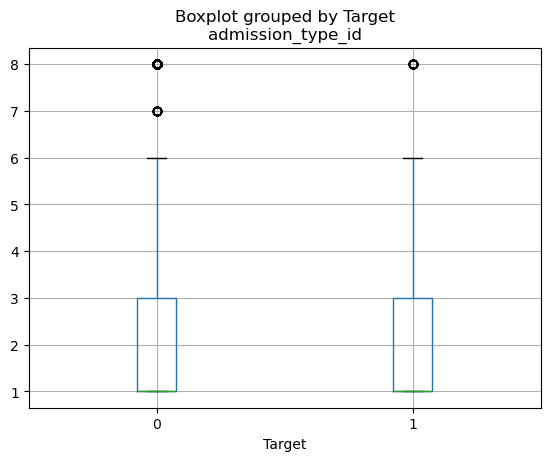

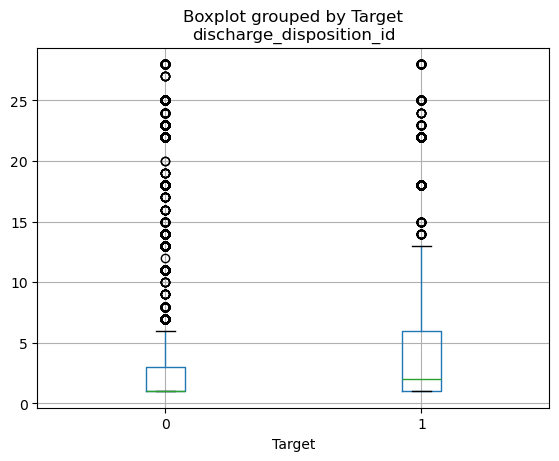

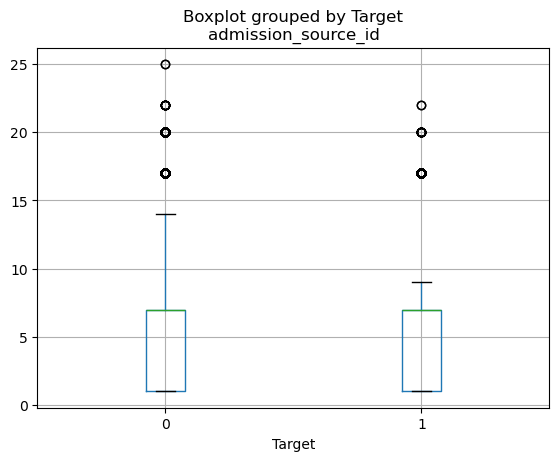

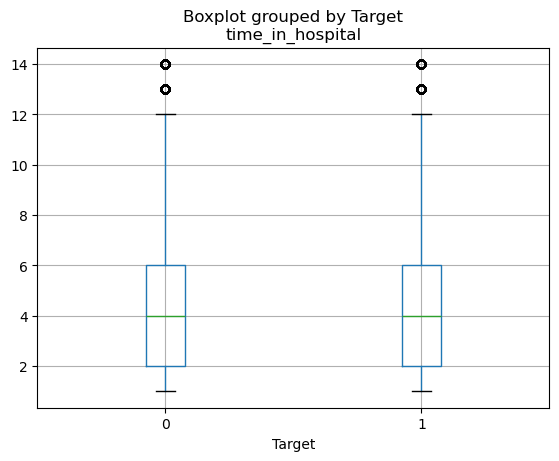

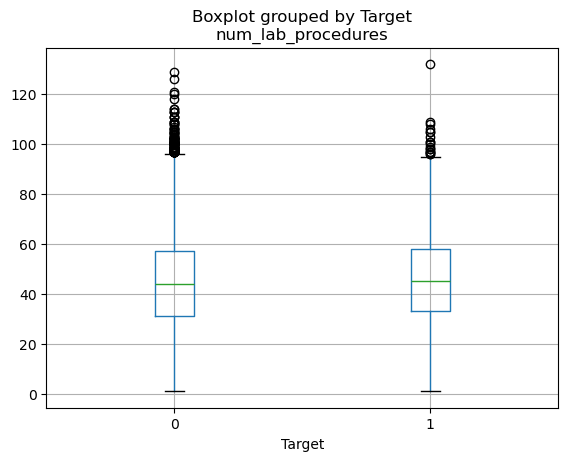

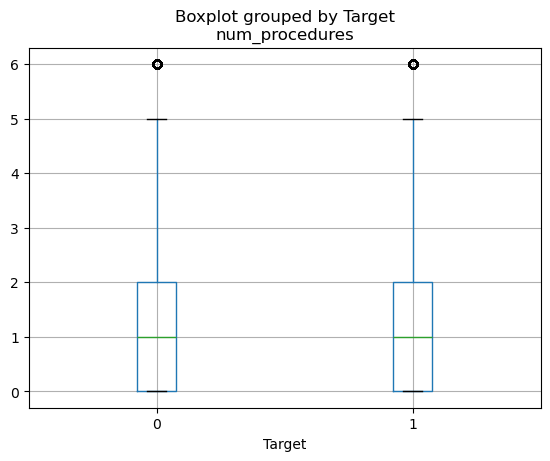

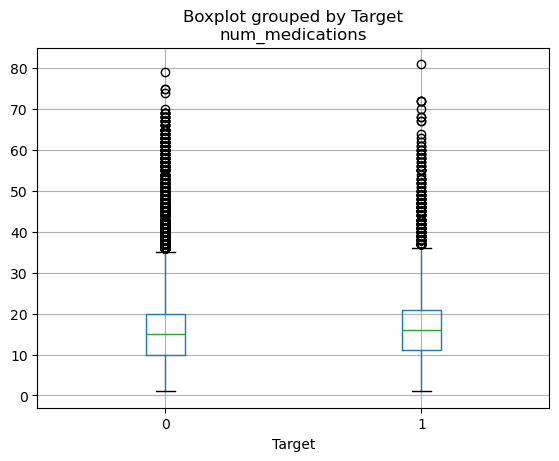

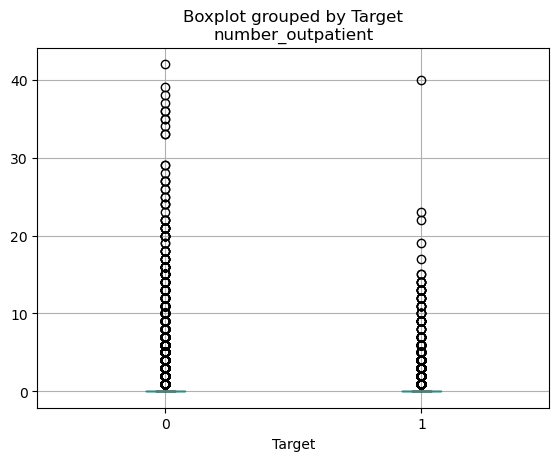

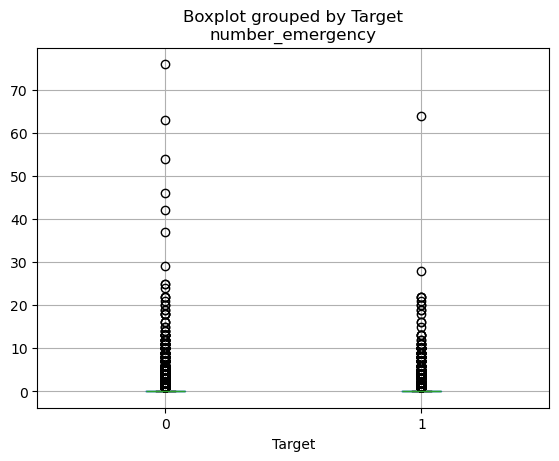

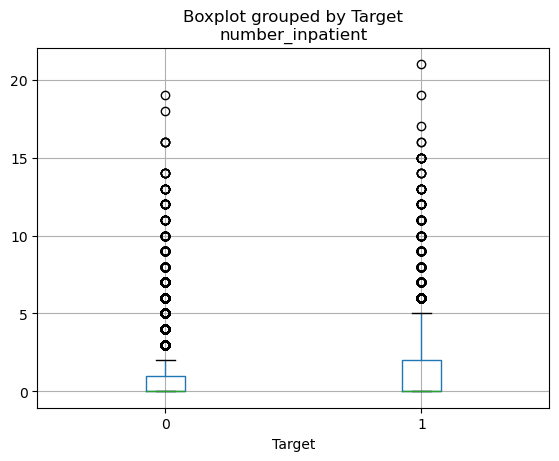

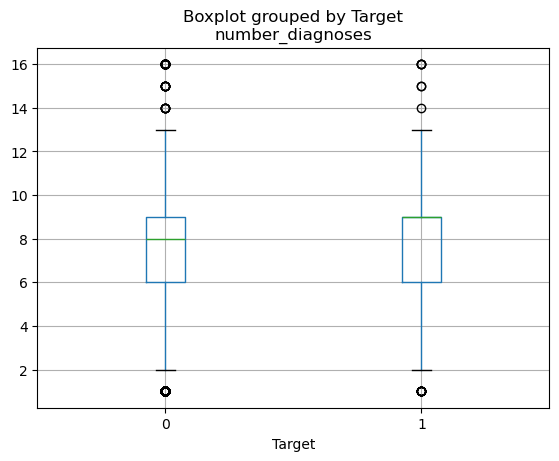

In [24]:
#,Define,the,numerical,and,categorical,columns,for,analysis
for  var in numerical_columns[:-1]:
     df.boxplot(var, by = 'Target')
     plt.show()


### Observations


### 3.1.2) Categorical variable vs Target variable

In [27]:
cat_cols

Index(['gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'race', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3'],
      dtype='object')

## Levels of categorical variables

#### Check for levels of categorical variables

When dealing with categorical variables in Matplotlib, having too many unique levels can lead to cluttered and unreadable charts. Hence, we need to find the count of levels in our categorical variables.

In [30]:
i      =  1
mcols  =  list()
for   var in cat_cols:
      df1  = pd.DataFrame(df[var].value_counts()).reset_index()
      n    = df1.shape[0]
      print("\n{0} - {1} - Levels {2}\n{3}".format(i, var,n, df1))
      i   += 1
      classes_l   =  df1[var].unique()
      print("\n---{}".format(df1.head()))
      print("\nClasses {}".format(classes_l))
      classes_15   =  classes_l[:15]
      class_OTH    =  classes_l[15:]
      print("\nOTHER classes {}".format(class_OTH))
      if n > 15:
         mcols.append(var)
print(mcols)


1 - gender - Levels 3
            gender  count
0           Female  54708
1             Male  47055
2  Unknown/Invalid      3

---            gender  count
0           Female  54708
1             Male  47055
2  Unknown/Invalid      3

Classes ['Female' 'Male' 'Unknown/Invalid']

OTHER classes []

2 - age - Levels 10
        age  count
0   [70-80)  26068
1   [60-70)  22483
2   [50-60)  17256
3   [80-90)  17197
4   [40-50)   9685
5   [30-40)   3775
6  [90-100)   2793
7   [20-30)   1657
8   [10-20)    691
9    [0-10)    161

---       age  count
0  [70-80)  26068
1  [60-70)  22483
2  [50-60)  17256
3  [80-90)  17197
4  [40-50)   9685

Classes ['[70-80)' '[60-70)' '[50-60)' '[80-90)' '[40-50)' '[30-40)' '[90-100)'
 '[20-30)' '[10-20)' '[0-10)']

OTHER classes []

3 - max_glu_serum - Levels 4
  max_glu_serum  count
0           Nil  96420
1          Norm   2597
2          >200   1485
3          >300   1264

---  max_glu_serum  count
0           Nil  96420
1          Norm   2597
2          >

### Observations

| Slno | Column name | Levels | Remarks | 
| --- | -------------- | --- | ------------| 
| 1 | gender | 3 |  |
| 2 | age | 10 |   |
| 3 | max_glu_serum | 4 |   |
| 4 | A1Cresult | 4 |   |
| 5 | metformin | 4 |   |
| 6 | repaglinide | 4 |   |
| 7 | nateglinide | 4 |   |
| 8 | chlorpropamide | 4 |   |
| 9 | glimepiride | 4 |   |
| 10 | acetohexamide | 2 |   |
| 11 | glipizide | 4 |   |
| 12 | glyburide | 4 |   |
| 13 | tolbutamide | 2 |   |
| 14 | pioglitazone | 4 |   |
| 15 | rosiglitazone | 4 |   |
| 16 | acarbose | 4 |   |
| 17 | miglitol | 4 |   |
| 18 | troglitazone | 2 |   |
| 19 | tolazamide | 3 |   |
| 20 | insulin | 4 |   |
| 21 | glyburide-metformin | 4 |   |
| 22 | glipizide-metformin | 2 |   |
| 23 | glimepiride-pioglitazone | 2 |   |
| 24 | metformin-rosiglitazone | 2 |   |
| 25 | metformin-pioglitazone | 2 |   |
| 26 | change | 2 |   |
| 27 | diabetesMed | 2 |   |
| 28 | race | 5 |   |
| 29 | payer_code | 17 | Levels to be reduced by grouping together the categories that have a low frequency into a single category such as "Others" |
| 30 | medical_specialty | 75 | Levels to be reduced by grouping together the categories that have a low frequency into a single category such as "Others"  |
| 31 | diag_1 | 716 | Too many levels |
| 32 | diag_2 | 748 | Too many levels |
| 33 | diag_3 | 789 | Too many levels |


### Observations

When the number of categories exceed 15, we group together the categories that have a low frequency into a single category such as "Others".


#### Group together the categories of the column, **payer_code** that have a low frequency into a single category such as "Others".

In [35]:
Payer_code_li = ['OT','SI']
for val in Payer_code_li:
    str_replace('payer_code',val)

In [36]:
df['payer_code'].value_counts()

payer_code
MC        54579
MD        14421
HM        11230
SP         5007
BC         4655
CP         2533
UN         2448
CM         1937
MP         1550
OG         1083
FR          739
PO          592
DM          560
Others      151
CH          146
WC          135
Name: count, dtype: int64

#### Group together the categories of the column, **medical_specialty** that have a low frequency into a single category such as "Others".

In [38]:
medical_specialty_li = ['Oncology','Obstetrics','Gynecology','Gastroenterology','Ophthalmology','Osteopath','Otolaryngology','Radiologist',\
'OutreachServices','Pediatrics','Pulmonology','Psychiatry','Pathology','Urology','Surgery-Cardiovascular/Thoracic',\
'Pediatrics-AllergyandImmunology','Pediatrics-CriticalCare','Surgery-Vascular','Surgery-Neuro','Pediatrics-Endocrinology',\
'PhysicalMedicineandRehabilitation','Endocrinology-Metabolism','Pediatrics-EmergencyMedicine','Endocrinology',\
'Pediatrics-Hematology-Oncology','Pediatrics-InfectiousDiseases','Pediatrics-Neurology','Podiatry','Surgery-Thoracic',\
'Psychology','Surgery-Cardiovascular','Dermatology','Pediatrics-Pulmonology','Radiology','Dentistry','Surgeon',\
'Surgery-Plastic','Perinatology','SurgicalSpecialty','DCPTEAM','Anesthesiology-Pediatric','Cardiology-Pediatric',\
'PhysicianNotFound','Rheumatology','Anesthesiology','Surgery-Maxillofacial','Surgery-Colon&Rectal',\
'AllergyandImmunology','Surgery-Pediatric','Proctology','Psychiatry-Child/Adolescent','Psychiatry-Addictive','-2','Resident',\
'Surgery-PlasticwithinHeadandNeck','-4','-3','SportsMedicine','Speech']

In [39]:
for val in medical_specialty_li:
    str_replace('medical_specialty',val)

In [40]:
df['medical_specialty'].value_counts()

medical_specialty
Others                                  24274
InternalMedicine                        18395
Family/GeneralPractice                   8082
Emergency/Trauma                         7709
Cardiology                               5371
Nephrology                               5248
InfectiousDiseases                       3821
Hospitalist                              3474
Neurology                                3430
Hematology/Oncology                      3170
Surgery-General                          3099
Neurophysiology                          2920
Orthopedics                              2846
ObstetricsandGynecology                  2578
Orthopedics-Reconstructive               2536
Obsterics&Gynecology-GynecologicOnco     2471
Hematology                               2342
Name: count, dtype: int64

### Catplots

Catplot allows you to plot the count of each category for non-numerical/categorical variables.
We shall plot catplots for all the categorical variables except **diag_1, diag_2 and diag_3** having more than 700 levels.

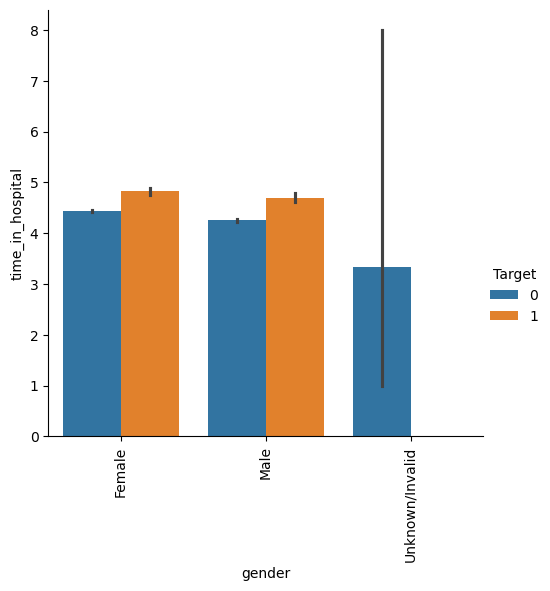

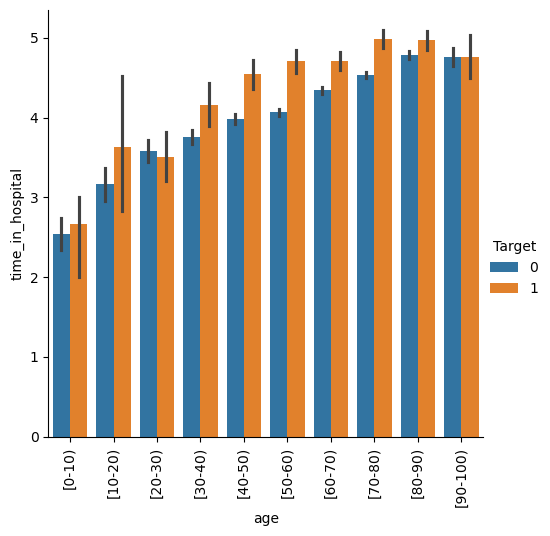

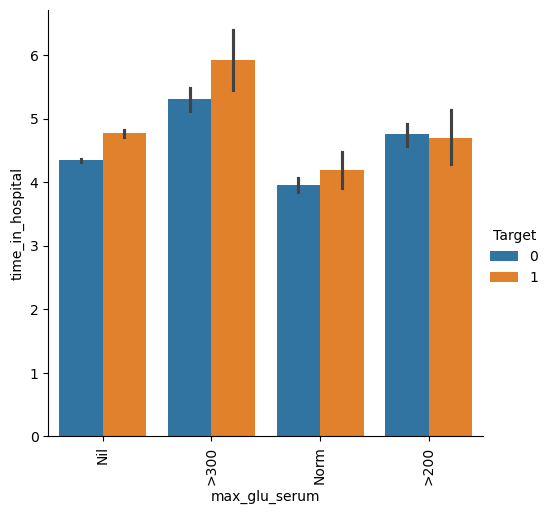

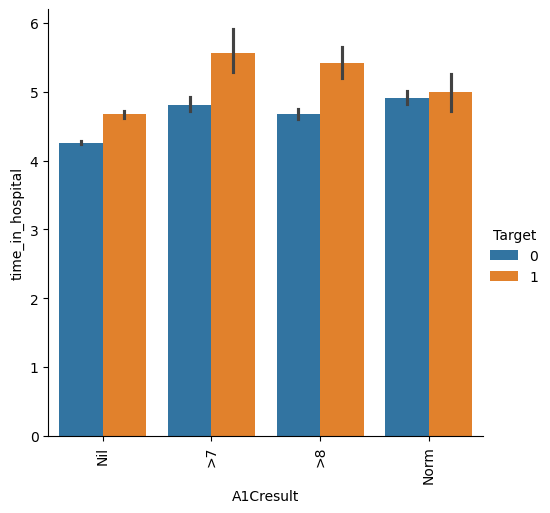

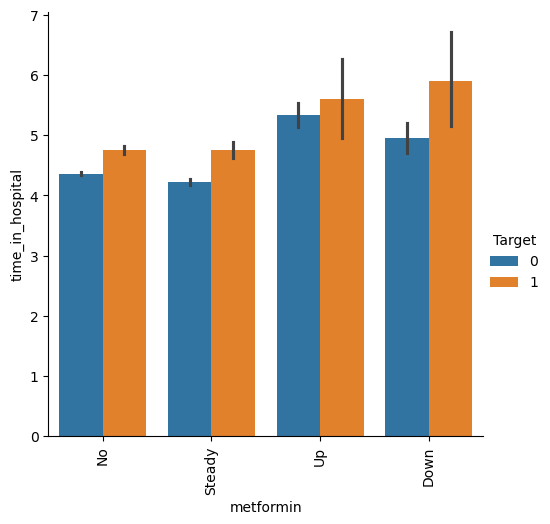

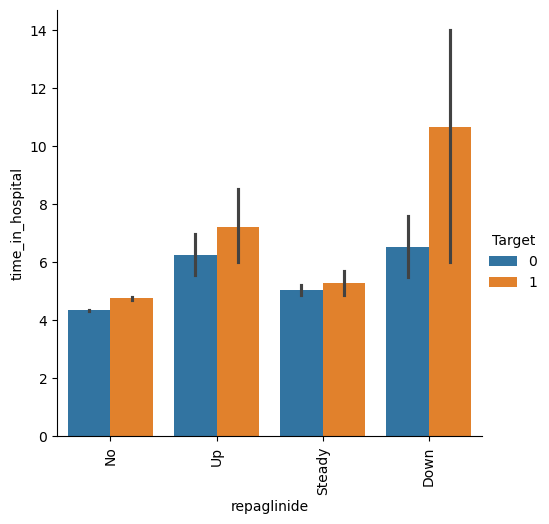

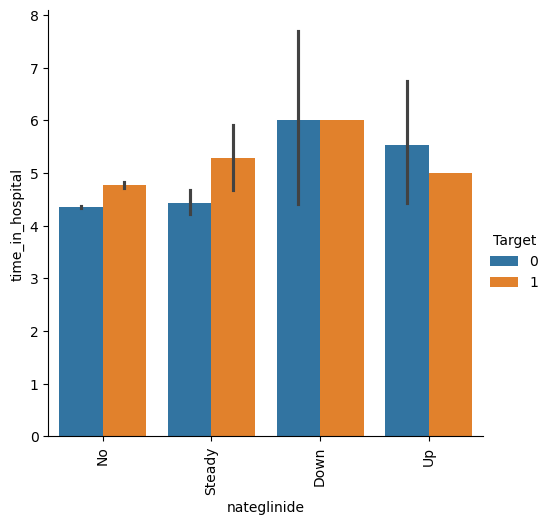

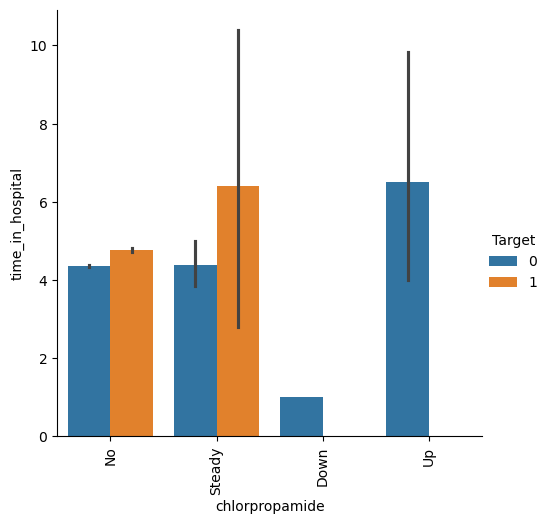

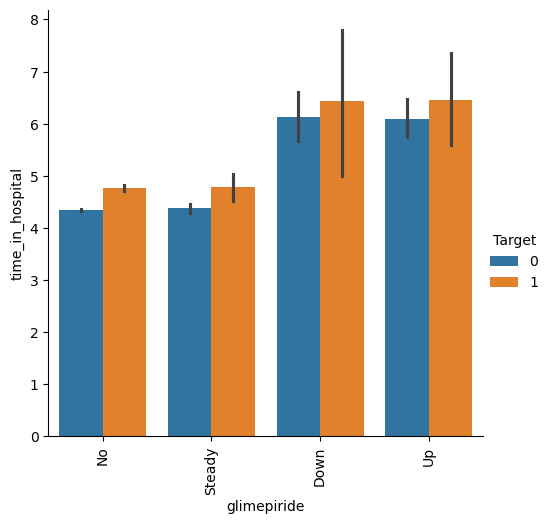

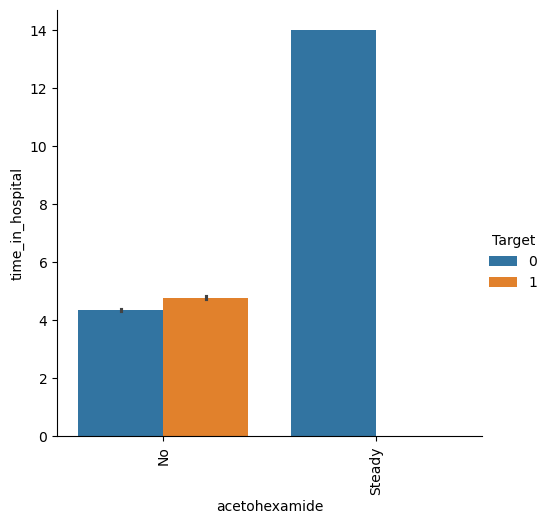

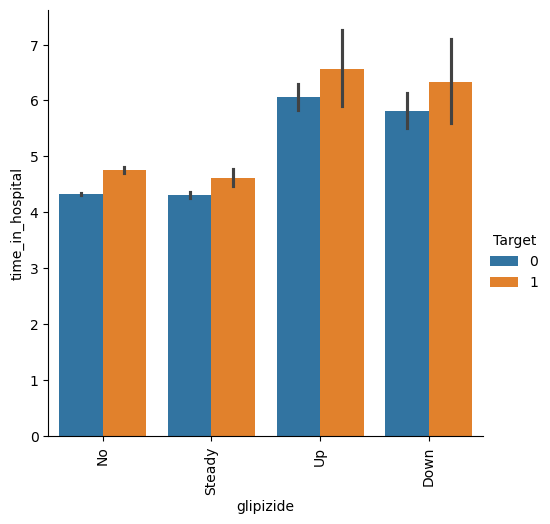

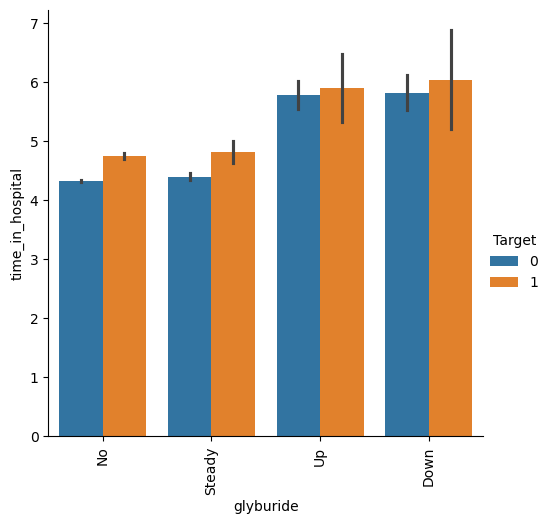

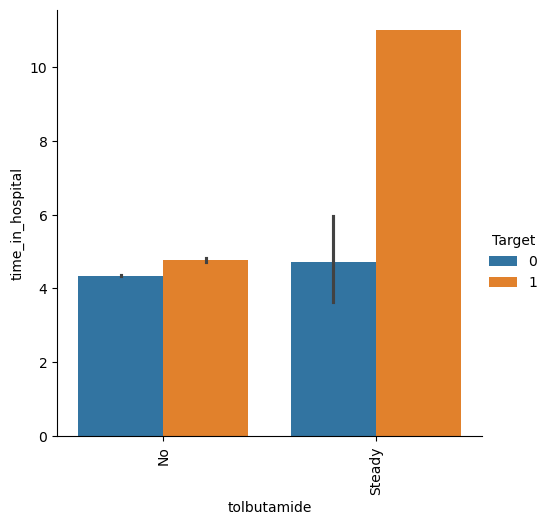

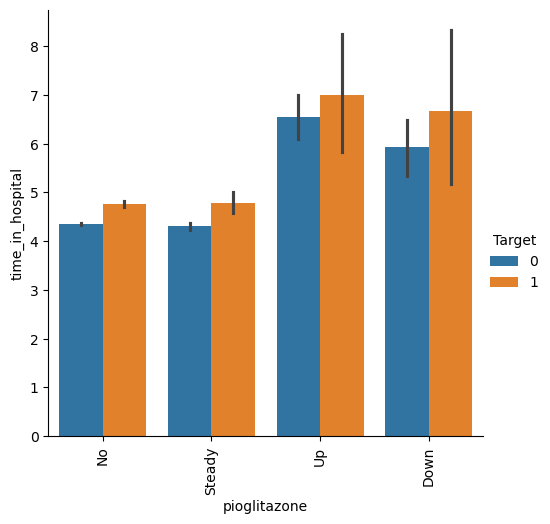

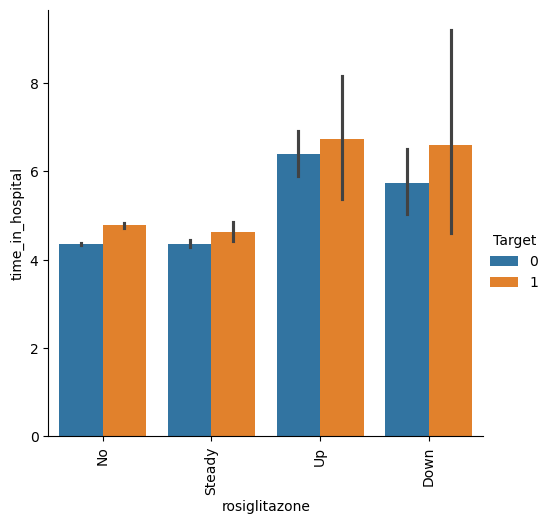

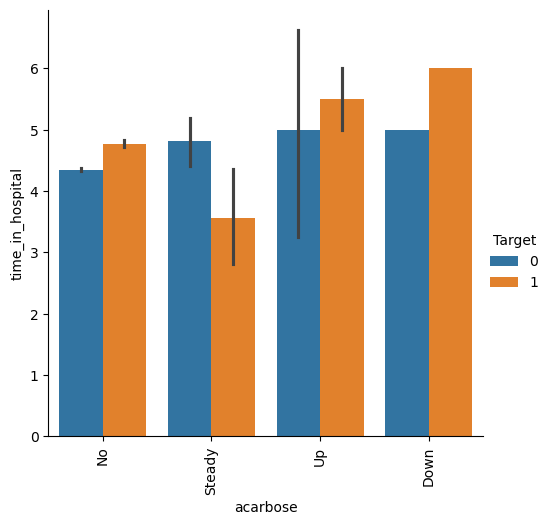

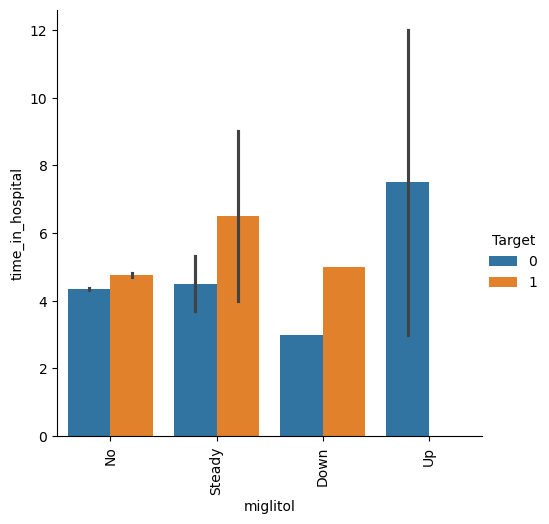

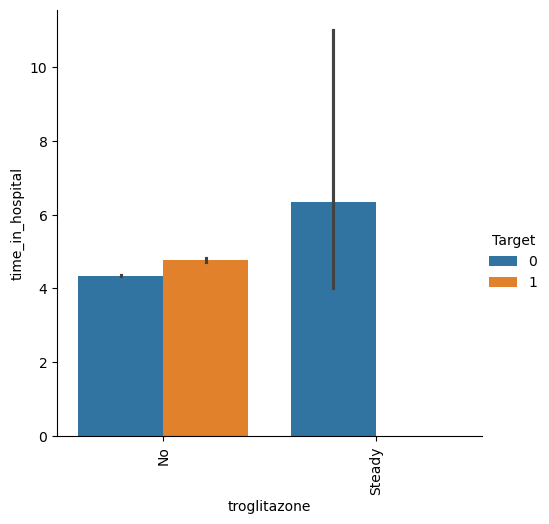

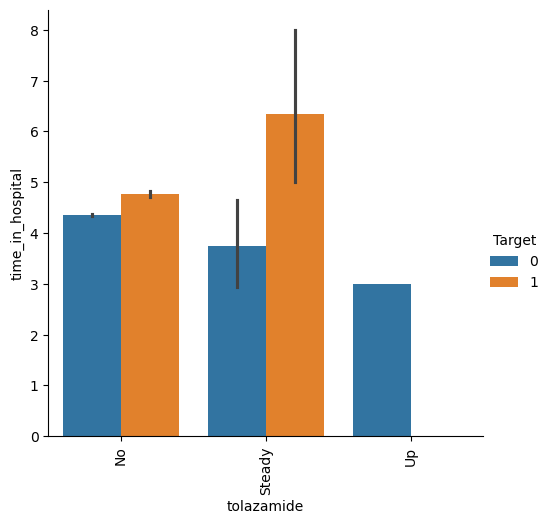

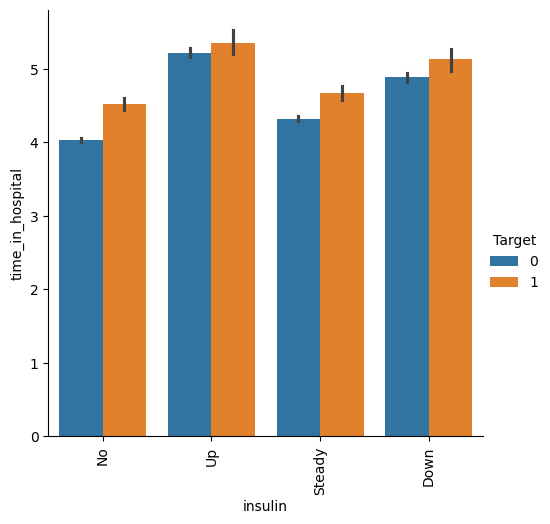

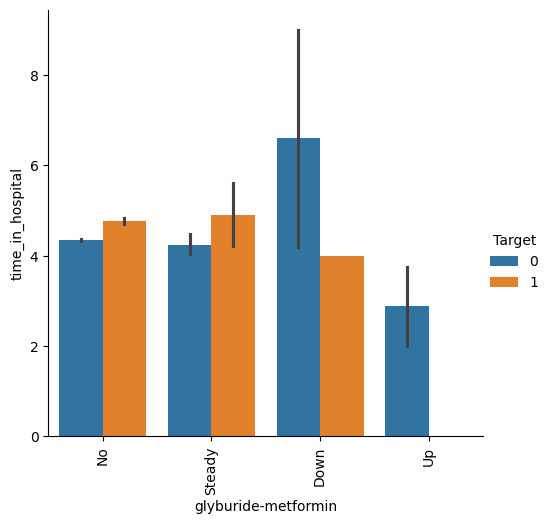

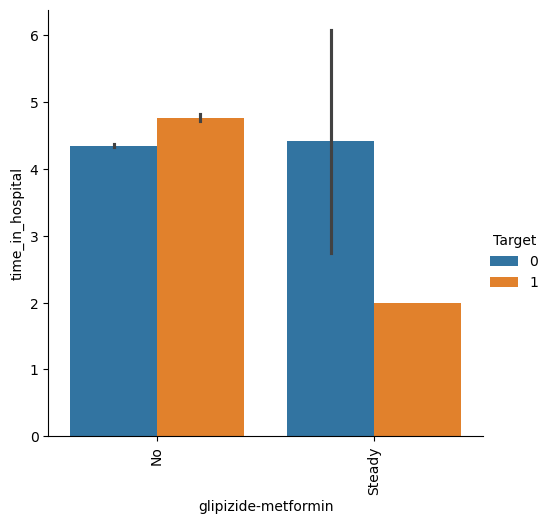

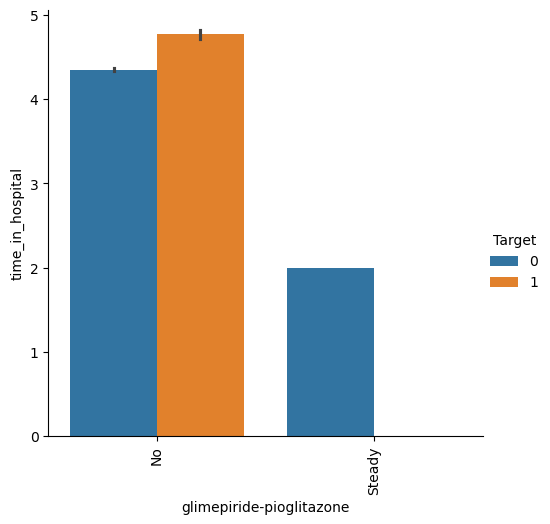

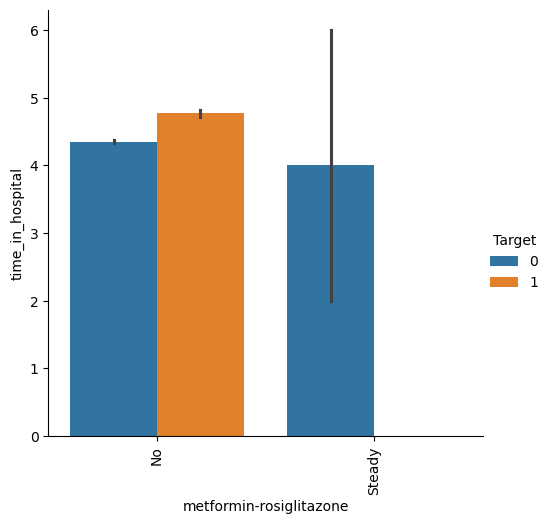

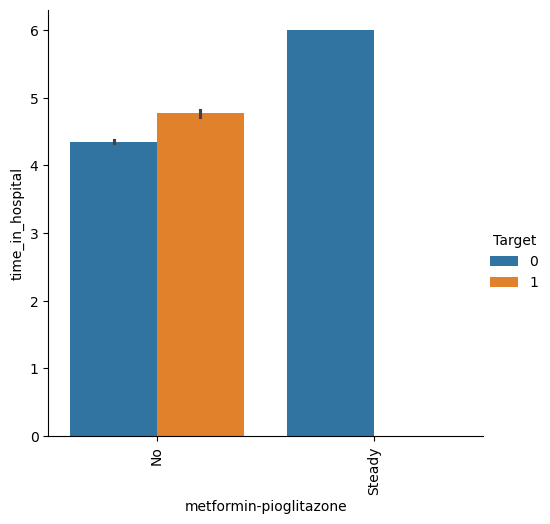

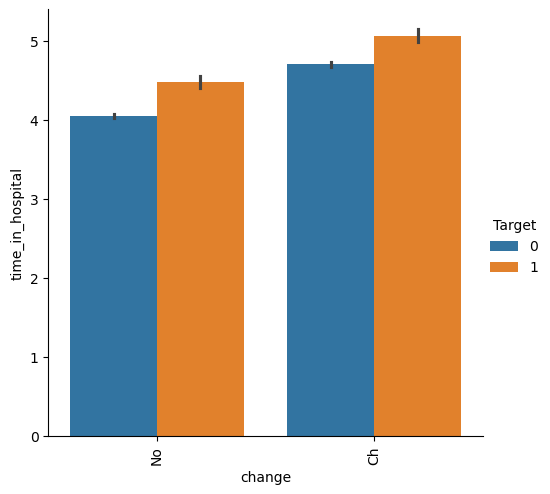

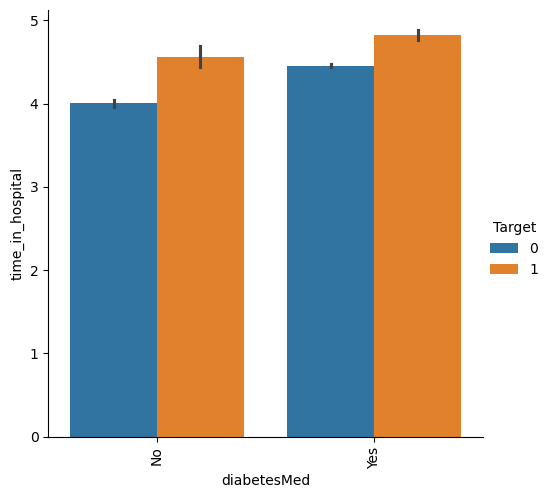

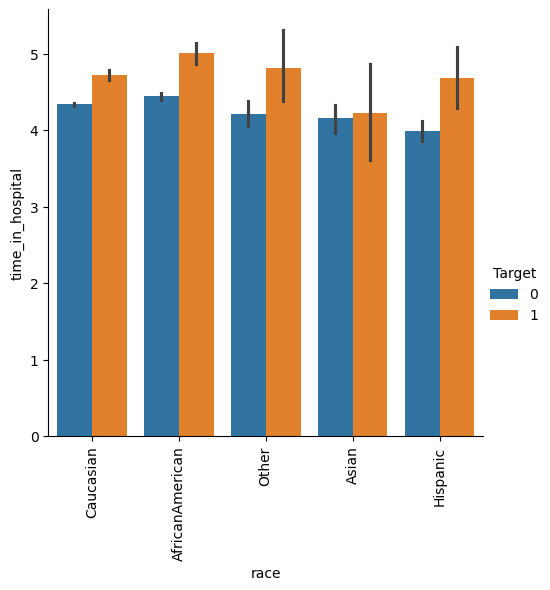

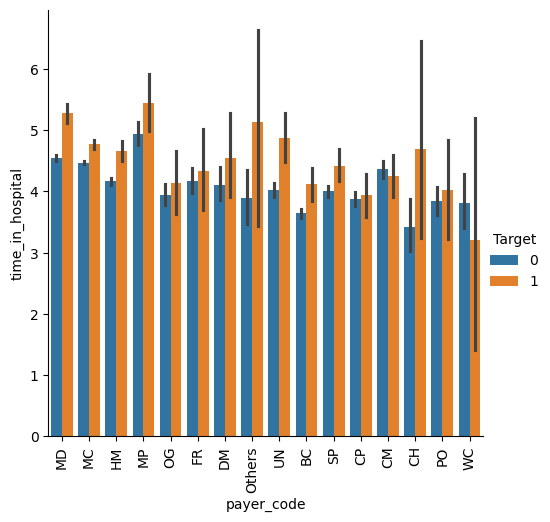

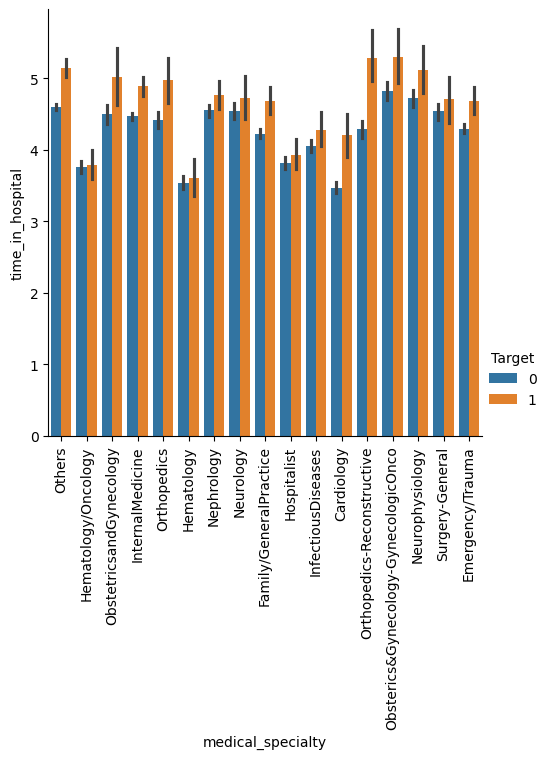

In [42]:
for  var in cat_cols[:-3]:
     sns.catplot(data = df, x = var, y = "time_in_hospital", hue ='Target', kind="bar")
     plt.xticks(rotation = 90) 
     plt.show()

## Check for 
### 3.2	Multi-collinearity
### 3.3	Distribution of variables
### 3.4	Presence of outliers and its treatment 
### 3.5	Statistical significance of variables
### 3.6	Class imbalance and its treatment


### 3.2	Multi-collinearity

In [45]:
X   = num_df[['race', 'gender', 'age', 'admission_type_id','discharge_disposition_id', 'admission_source_id',\
             'time_in_hospital','payer_code', 'medical_specialty', 'num_lab_procedures','num_procedures', 'num_medications',\
             'number_outpatient','number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',\
             'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin','repaglinide', 'nateglinide', 'chlorpropamide',\
             'glimepiride','acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone',\
             'acarbose', 'miglitol', 'troglitazone','tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',\
             'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed']]
Y  = num_df['Target']

In [46]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   payer_code                101766 non-null  int64
 8   medical_specialty         101766 non-null  int64
 9   num_lab_procedures        101766 non-null  int64
 10  num_procedures            101766 non-null  int64
 11  num_medications           101766 non-null  int64
 12  number_outpatient         101766 non-null  int64
 13  number_emergency          101766 non-null  int64
 14  number_inpatient    

In [47]:
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data            =  pd.DataFrame()
vif_data["feature"] =  X.columns
  
# calculating VIF for each feature
vif_data["VIF"]     = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,race,5.028275
1,gender,1.900535
2,age,18.008124
3,admission_type_id,3.466394
4,discharge_disposition_id,1.580362
5,admission_source_id,3.484454
6,time_in_hospital,4.510338
7,payer_code,7.904918
8,medical_specialty,4.349158
9,num_lab_procedures,7.140737


In [48]:
vif_data.loc[vif_data['VIF'] > 5]

,feature,VIF
0,race,5.028275
2,age,18.008124
7,payer_code,7.904918
9,num_lab_procedures,7.140737
11,num_medications,8.440431
15,diag_1,5.556627
18,number_diagnoses,20.315630
19,max_glu_serum,42.560188
20,A1Cresult,14.752328
21,metformin,9.767257


In [49]:
vif_data.loc[vif_data['VIF'] > 5, 'feature'].to_list()

['race',
 'age',
 'payer_code',
 'num_lab_procedures',
 'num_medications',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'glyburide-metformin',
 'diabetesMed']

### Observations

### Interpretation of VIF value

The higher the value, the greater the correlation of the variable with other variables. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

The following **22** variables have VIF value above the threshold value of 5:
1) 'race',
2) 'age',
3) 'payer_code',
4) 'num_lab_procedures',
5) 'num_medications',
6) 'diag_1',
7) 'number_diagnoses',
8) 'max_glu_serum',
9) 'A1Cresult',
10) 'metformin',
11) 'repaglinide',
12) 'nateglinide',
13) 'chlorpropamide',
14) 'glimepiride',
15) 'glipizide',
16) 'glyburide',
17) 'pioglitazone',
18) 'rosiglitazone',
19) 'acarbose',
20) 'miglitol',
21) 'glyburide-metformin',
22) 'diabetesMed'
    
We need to remove variables having greater than the threshold value of 5 from our dataset.

In [51]:
calculate_vif_(X)

dropping 'miglitol' at index: 33
dropping 'chlorpropamide' at index: 24
dropping 'acarbose' at index: 31
dropping 'glyburide-metformin' at index: 34
dropping 'nateglinide' at index: 23
dropping 'repaglinide' at index: 22
dropping 'max_glu_serum' at index: 19
dropping 'number_diagnoses' at index: 18
dropping 'glimepiride' at index: 20
dropping 'rosiglitazone' at index: 25
dropping 'age' at index: 2
dropping 'pioglitazone' at index: 23
dropping 'A1Cresult' at index: 17
dropping 'glyburide' at index: 20
dropping 'glipizide' at index: 19
dropping 'num_medications' at index: 10
dropping 'metformin' at index: 16
dropping 'payer_code' at index: 6
dropping 'num_lab_procedures' at index: 7
dropping 'diabetesMed' at index: 24
Remaining variables:
Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,acetohexamide,tolbutamide,troglitazone,tolazamide,insulin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,2,0,6,25,1,1,37,0,0,0,0,124,195,224,0,0,0,0,1,0,0,0,0,1
1,2,0,1,1,7,3,15,0,0,0,0,143,79,121,0,0,0,0,3,0,0,0,0,0
2,0,0,1,1,7,2,24,5,2,0,1,454,78,766,0,0,0,0,1,0,0,0,0,1
3,2,1,1,1,7,2,18,1,0,0,0,554,97,248,0,0,0,0,3,0,0,0,0,0
4,2,1,1,1,7,1,15,0,0,0,0,54,24,86,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,1,3,7,3,15,0,0,0,0,102,148,295,0,0,0,0,0,0,0,0,0,0
101762,0,0,1,4,5,5,18,3,0,0,1,381,133,536,0,0,0,0,2,0,0,0,0,1
101763,2,1,1,1,7,1,10,0,1,0,0,236,389,159,0,0,0,0,0,0,0,0,0,0
101764,2,0,2,3,7,10,62,2,0,0,1,693,142,668,0,0,0,0,3,0,0,0,0,0


### Observations

We observe that 24 variables are non-collinear:
1) 'race'
2) 'gender'
3) 'admission_type_id'
4) 'discharge_disposition_id'
5) 'admission_source_id'
6) 'time_in_hospital'
7) 'medical_specialty'
8) 'num_procedures'
9) 'number_outpatient'
10) 'number_emergency'
11) 'number_inpatient'
12) 'diag_1'
13) 'diag_2'
14) 'diag_3'
15) 'acetohexamide'
16) 'tolbutamide'
17) 'troglitazone'
18) 'tolazamide'
19) 'insulin'
20) 'glipizide-metformin'
21) 'glimepiride-pioglitazone'
22) 'metformin-rosiglitazone'
23) 'metformin-pioglitazone'
24) 'change'

### 3.3	Distribution of variables

## a) Histograms for numerical discrete data

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

In our case, 
We have **eleven (11)** numerical variables namely,
1) 'admission_type_id'
2) 'discharge_disposition_id'
3) 'admission_source_id'
4) 'time_in_hospital'
5) 'num_lab_procedures'
6) 'num_procedures'
7) 'num_medications'
8) 'number_outpatient'
9) 'number_emergency'
10) 'number_inpatient'
11) 'number_diagnoses'

None of them are continuous numeric variables. **To plot a distribution of a discrete random variable, we must go for a bar plot and plotting the Probability Mass Function (PMF) instead**.

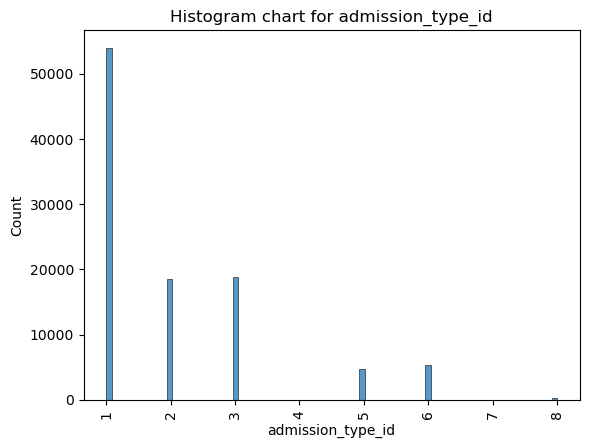

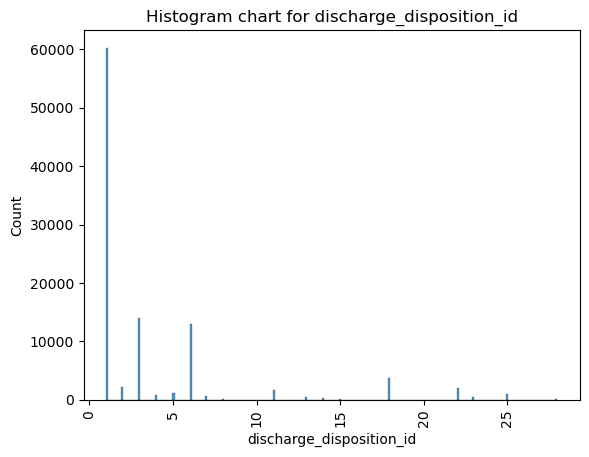

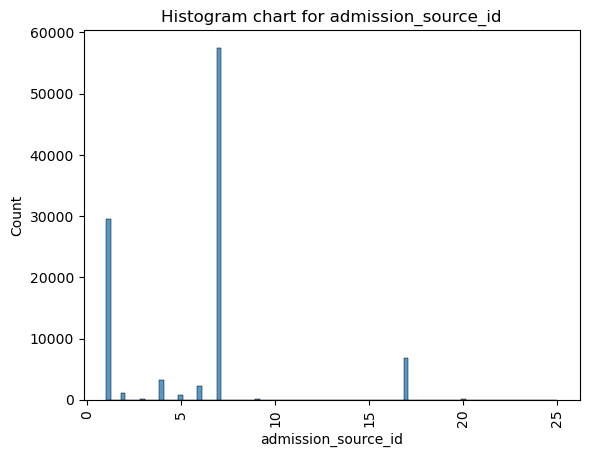

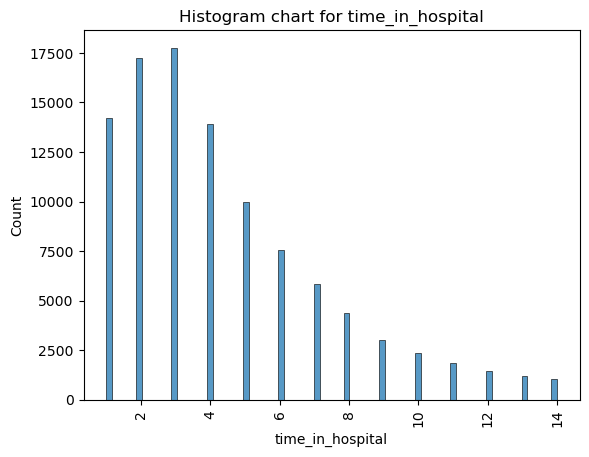

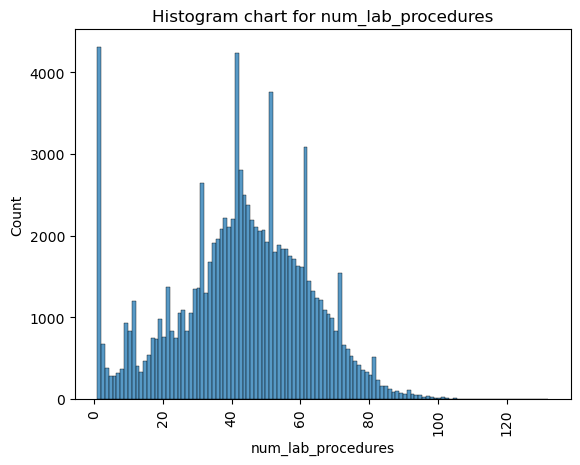

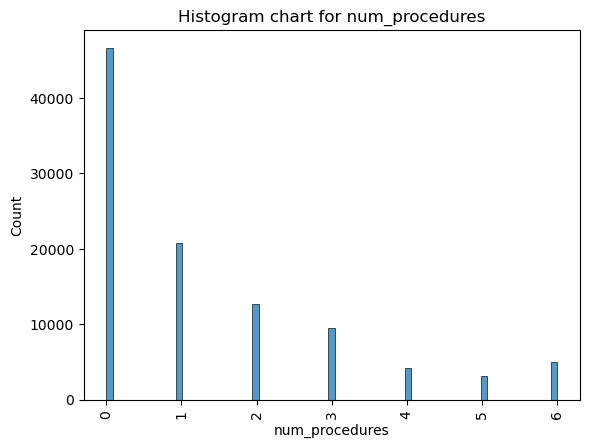

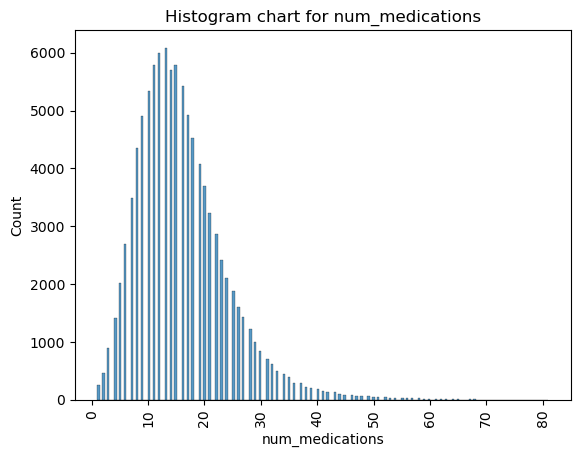

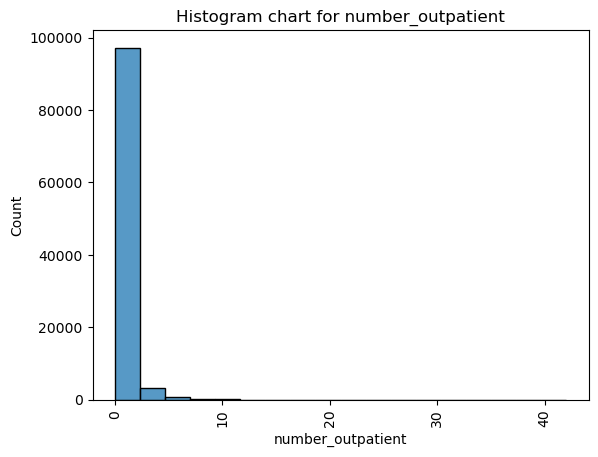

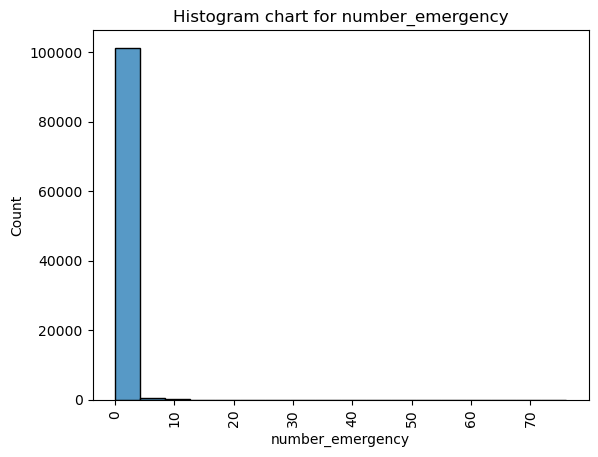

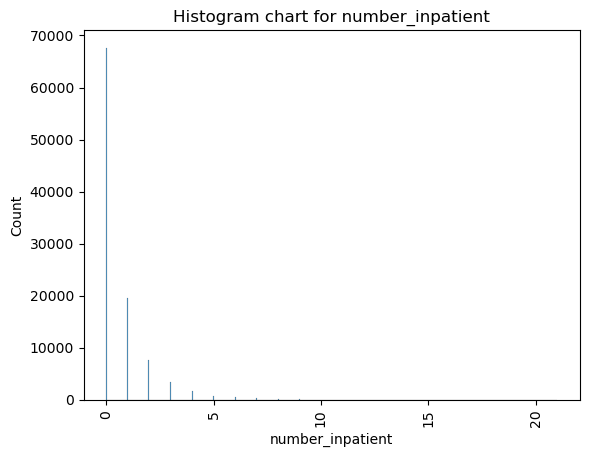

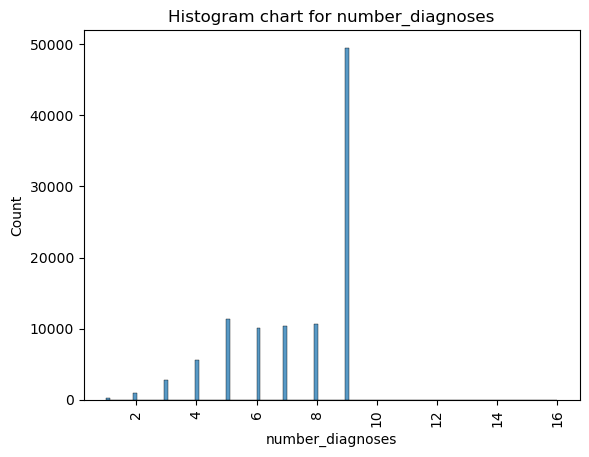

In [57]:
# plotting the points 
num_vars = ['admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures',\
            'num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
for num_var in num_vars:
    sns.histplot(data = df, x = num_var)
    #Title
    ttle =  "Histogram chart for " + num_var  
    plt.title(ttle)
    plt.xticks(rotation = 90)
    # function to show the plot
    plt.show()

## b) Bar charts for categorical variables

### A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars.


1: Variable, race


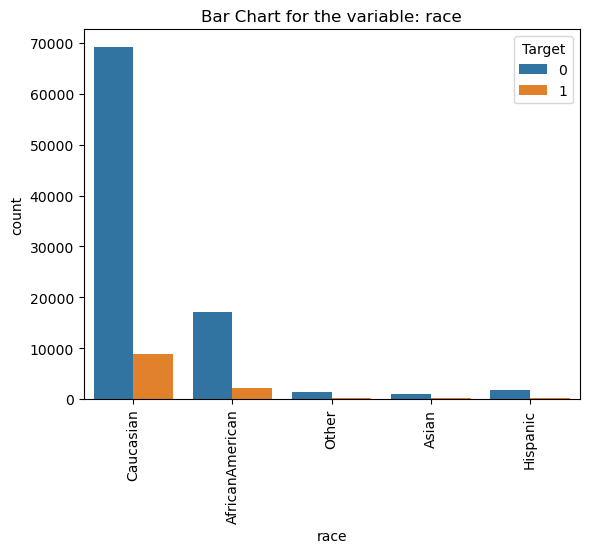


2: Variable, gender


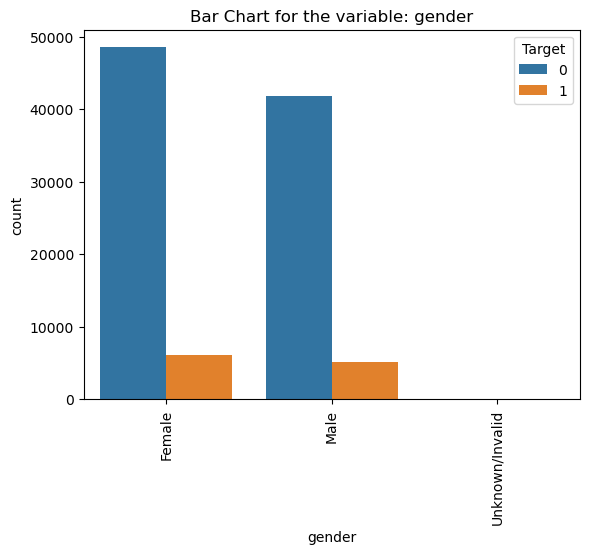


3: Variable, medical_specialty


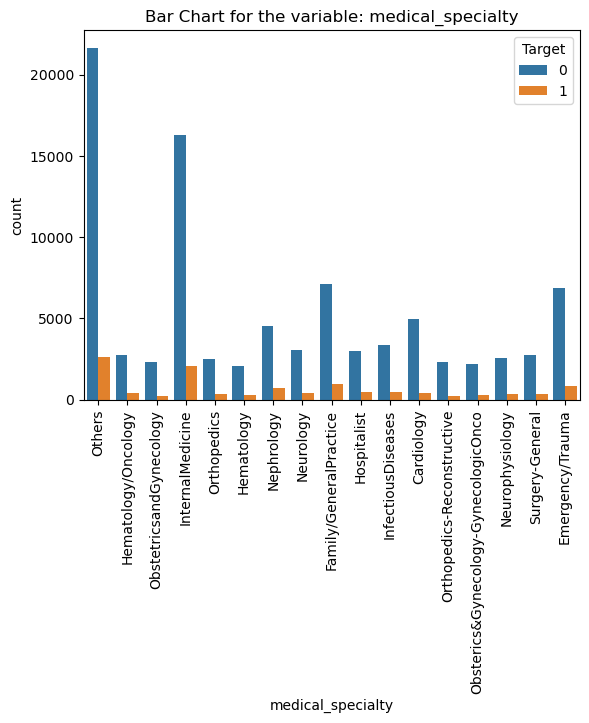


4: Variable, diag_1


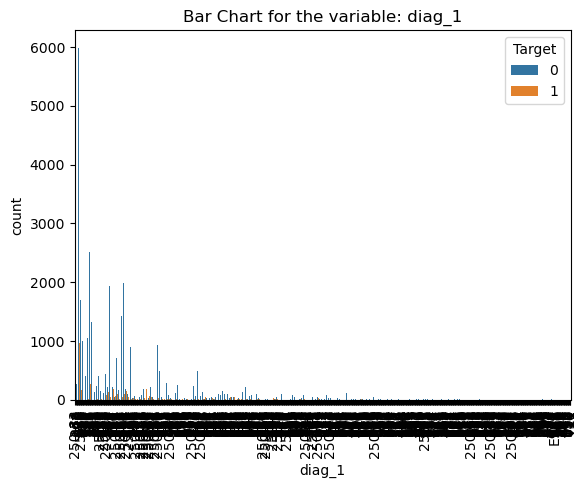


5: Variable, diag_2


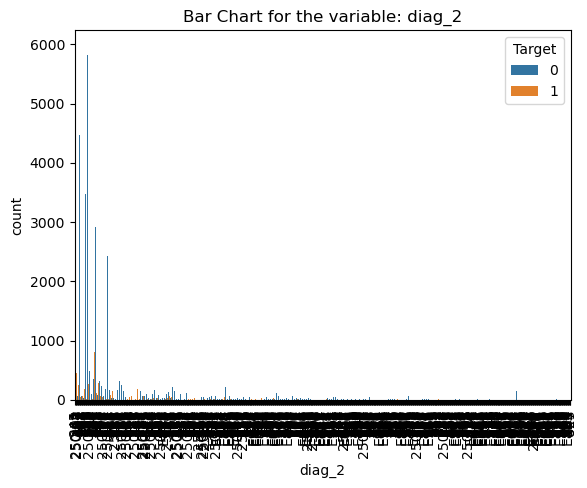


6: Variable, diag_3


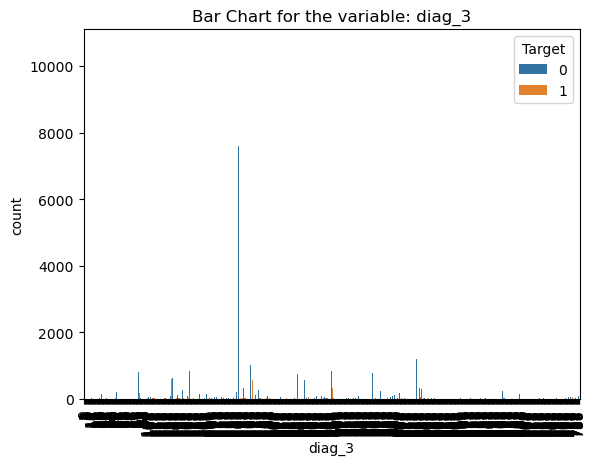


7: Variable, acetohexamide


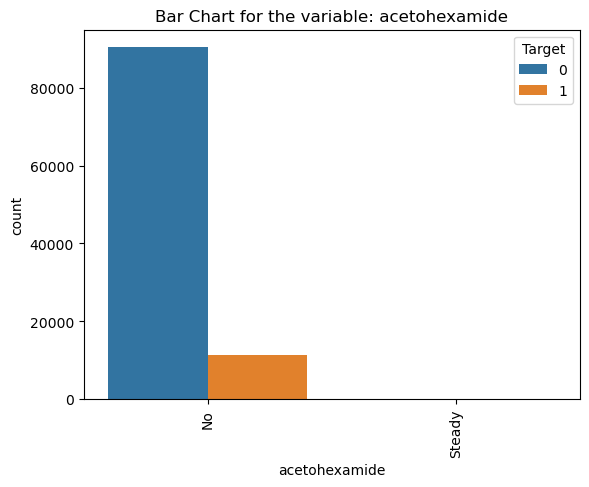


8: Variable, tolbutamide


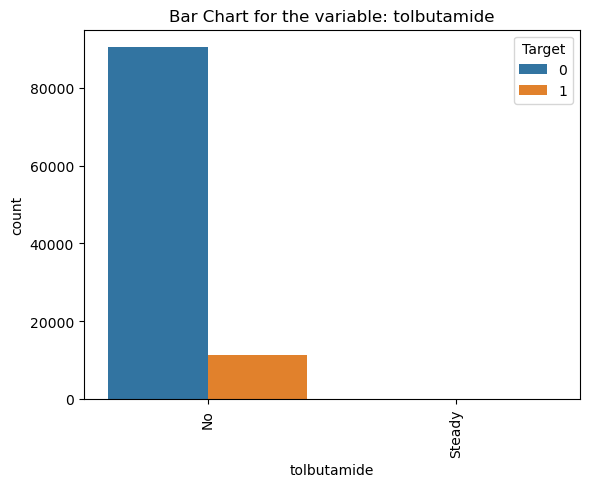


9: Variable, troglitazone


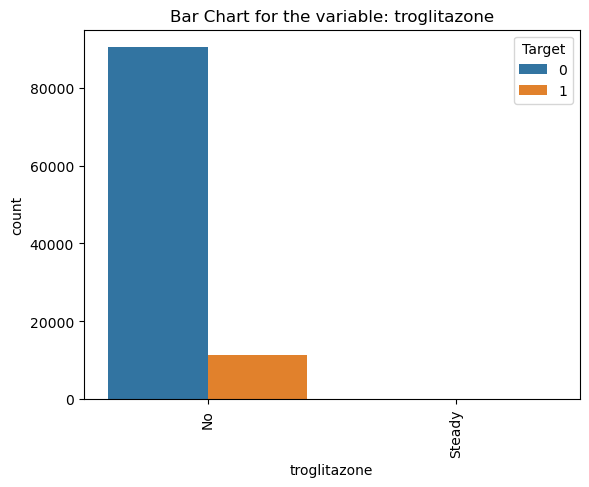


10: Variable, tolazamide


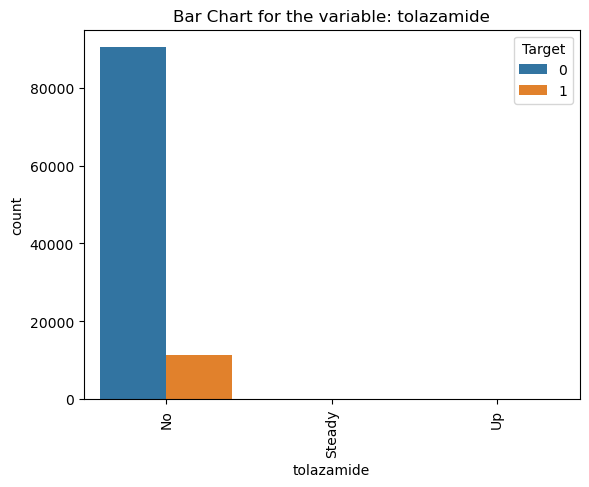


11: Variable, insulin


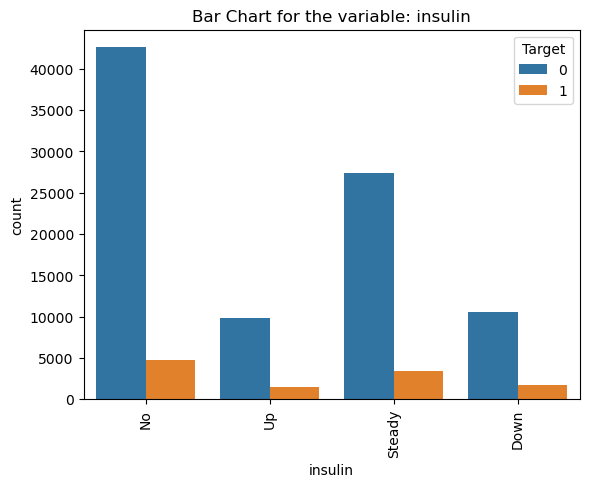


12: Variable, glipizide-metformin


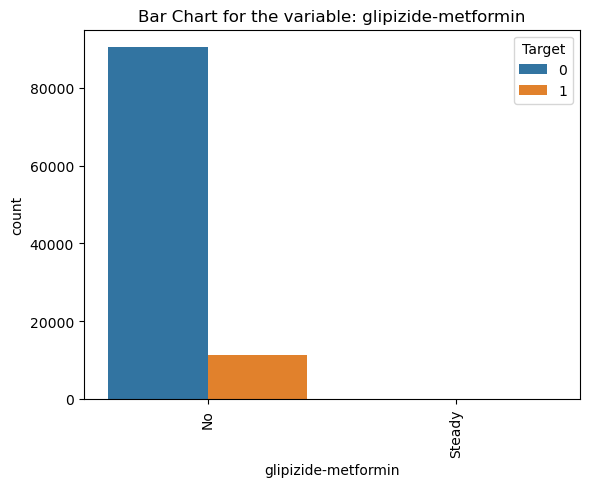


13: Variable, glimepiride-pioglitazone


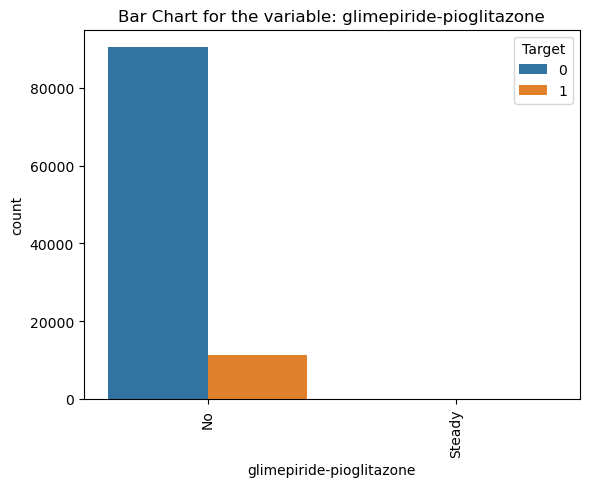


14: Variable, metformin-rosiglitazone


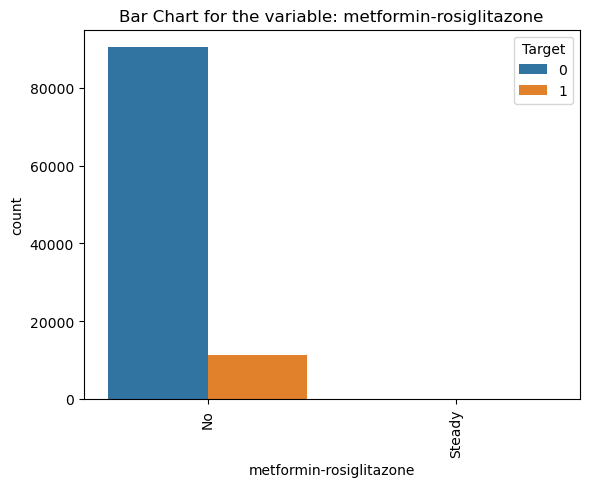


15: Variable, metformin-pioglitazone


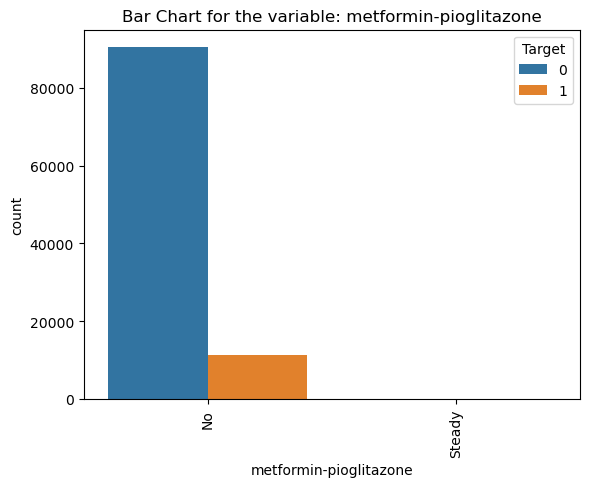


16: Variable, change


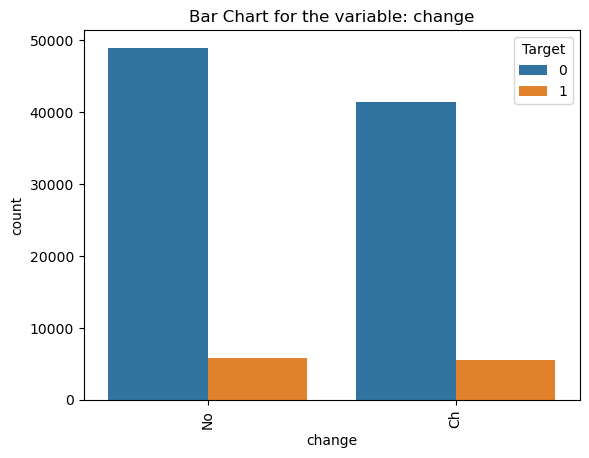

In [59]:
# Define the categorical columns for analysis
categorical_columns    =   ['race','gender','medical_specialty','diag_1','diag_2', 'diag_3', 'acetohexamide',\
                            'tolbutamide','troglitazone', 'tolazamide', 'insulin', 'glipizide-metformin','glimepiride-pioglitazone',\
                            'metformin-rosiglitazone','metformin-pioglitazone','change']
i                      =   1
for var in categorical_columns :
    draw_countplot(df, i, var)
    i += 1

### 3.4	Presence of outliers and its treatment 

Outliers badly affect mean and standard deviation of the dataset. It increases the error variance and reduces the power of statistical tests. By applying outlier treatment, machine learning practitioners can handle extreme values effectively. The primary goals of outlier treatment are: Identifying Outliers: Through various statistical methods, such as visualizations and mathematical approaches, outliers can be detected within a dataset.

We are interested to identify the outliers in our continuous numerical variables that affects the mean & standard deviation rather than the discrete numerical variables. Discrete variables are typically categorical, meaning they take on a limited number of values or categories. However, if the outlier is physically possible you should consider it.

### Unfortunately, we don't have any continuous numerical variables in our dataset.

### 3.5	Statistical significance of variables

### a) Numerical variables



### t test for discrete data

### The one sample t-test requires the sample data to be numeric and continuous, as it is based on the normal distribution. Hence, t test is not appropriate for our numerical data which are discrete.

### Kruskal–Wallis test
The Kruskal–Wallis test is a statistical test used to compare two or more groups for a continuous or discrete variable. It is a non-parametric test, meaning that it assumes no particular distribution of your data and is analogous to the one-way analysis of variance (ANOVA).

In [67]:
# Define the numerical and categorical columns for analysis
numerical_columns    = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital', 'num_lab_procedures',\
                        'num_procedures','num_medications', 'number_outpatient', 'number_emergency','number_inpatient', 'number_diagnoses']
for var in numerical_columns :
    chk_kruskal(var)


There is a statistically significant difference between the mean values of two groups of the Variable, admission_type_id 

There is a statistically significant difference between the mean values of two groups of the Variable, discharge_disposition_id 

There is a statistically significant difference between the mean values of two groups of the Variable, admission_source_id 

There is a statistically significant difference between the mean values of two groups of the Variable, time_in_hospital 

There is a statistically significant difference between the mean values of two groups of the Variable, num_lab_procedures 

There is No statistically significant difference between the mean values of two groups of the Variable, num_procedures 

There is a statistically significant difference between the mean values of two groups of the Variable, num_medications 

There is a statistically significant difference between the mean values of two groups of the Variable, number_outpatient 

There is a

### Observations

Based on the Kruskal–Wallis test, we observe that
* there is **a statistically significant difference** between the mean values of two groups of the **ten** Variables, listed below:
1) 'admission_type_id'
2) 'discharge_disposition_id'
3) 'admission_source_id'
4) 'time_in_hospital'
5) 'num_lab_procedures'
6) 'num_medications'
7) 'number_outpatient'
8) 'number_emergency'
9) 'number_inpatient'
10) 'number_diagnoses'
                        
* there is **no statistically significant difference** between the mean values of two groups of the Variable, listed below:
1) 'num_procedures'

### b) Categorical variables

The $\chi^2$ - (Chi Sqaure) test of independence analysis utilizes a cross tabulation table between the variables of interest r rows and c columns. 

Based on the cell counts, it is possible to test if there is a relationship, dependence, between the variables and to estimate the strength of the relationship. 

#### Assumptions

* The two samples are independent
* No expected cell count is = 0
* No more than 20% of the cells have and expected cell count < 5

### Hypothesis

Null hypothesis $H_0$: Variables are independent	

Alternative hypothesis $H_1$: Variables are NOT independent	

In [71]:
# Define the categorical columns for analysis
categorical_columns    =   ['race','gender','medical_specialty','diag_1','diag_2', 'diag_3', 'acetohexamide',\
                            'tolbutamide','troglitazone', 'tolazamide', 'insulin', 'glipizide-metformin','glimepiride-pioglitazone',\
                            'metformin-rosiglitazone','metformin-pioglitazone','change']
i  =  1
for var in categorical_columns :
    chk_chisq(i, var)
    i += 1


1: Variable, race

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=9.73902407328671, pvalue=0.045060892619467496, dof=4, expected_freq=array([[17066.1801584 ,  2143.8198416 ],
       [  922.16007311,   115.83992689],
       [69273.05558831,  8701.94441169],
       [ 1809.67251341,   227.32748659],
       [ 1337.93166676,   168.06833324]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,race and Target variable are dependent

2: Variable, gender

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=1.2372549359096927, pvalue=0.5386832905074449, dof=2, expected_freq=array([[4.86026332e+04, 6.10536678e+03],
       [4.18037016e+04, 5.25129842e+03],
       [2.66520252e+00, 3.34797477e-01

### Observations

We have checked each categorical independent variable with our target categorical variable using Chi Square test of independence. 

We observed the **main** assumption for chi-square test of independence *(No more than 20% of the cells have and expected cell count < 5)* is not satisfied for the following variables:
1) gender
2) diag_1
3) diag_2
4) diag_3
5) acetohexamide
6) tolbutamide
7) troglitazone
8) tolazamide
9) glipizide-metformin
10) glimepiride-pioglitazone
11) metformin-rosiglitazone
12) metformin-pioglitazone

Violating the chi-square test's assumptions can lead to inaccurately low or high p-values, which are used to determine the statistical significance of your results. An incorrect p-value might falsely suggest a relationship between categorical variables when there is none or mask an existing relationship. However, this assumption is satisfied for the following **four** variables:
13) 'race'
14) 'medical_specialty'
15) 'insulin'
16) 'change'

**Each of the independent variables, 'race', 'medical_specialty', 'insulin', 'change' and the target variable, Target are dependent.**


### 3.6	Class imbalance and its treatment

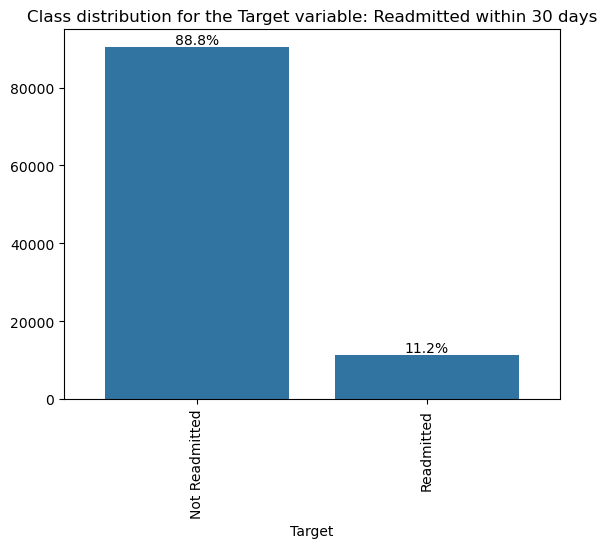

In [74]:
b    =   Y.value_counts()
ax   =   sns.barplot(x = b.index,y = b.values)

# get the total count of the type column
total =   df['Target'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

# add space at the end of the bar for the labels
ax.margins(x=0.1)

ttile     =  "Class distribution for the Target variable: {}".format('Readmitted within 30 days') 
x         =  [0, 1]  
labels    =  ['Not Readmitted', 'Readmitted']    
plt.xticks(x, labels, rotation ='vertical') 
plt.title(ttile) 
plt.show()

### Observations

As visible, our data is highly imbalanced. Imbalanced datasets can lead to a bias towards the majority class constituting 88.8% of the total, as the model is trained on a majority of samples from the majority class. This can result in poor performance in the minority class. **Hence, we need to treat data imbalance**.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique or **SMOTE** for short.

**Another method is under-sampling.**

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

We prefer **Over-sampling by SMOTE method**.

## END